In [1]:
from datetime import datetime
import pandas as pd
import re
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.axes as Axes
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import json
from pandas.io.json import json_normalize
import matplotlib as matplotlib
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
nv1217 = pd.read_csv('C:/Users/Shubham/Desktop/DSF/Project/nv_12_17_merged.csv')

In [5]:
list(nv1217.columns)

['Unnamed: 0',
 'state',
 'id',
 'county',
 'newspaper',
 'date',
 'notice_id',
 'count_tags',
 'combinations',
 'combinations_clean',
 'year',
 'month',
 'day',
 'FIPS',
 'State_x',
 'Rural_urban_continuum_code_2013',
 'Urban_influence_code_2013',
 'Metro_2013',
 'Median_Household_Income_2016',
 'Med_HH_Income_Percent_of_State_Total_2016',
 'Rural-urban_Continuum_Code_2003',
 'Urban_Influence_Code_2003_x',
 'Rural-urban_Continuum_Code_2013',
 'Urban_Influence_Code_2013_x',
 'POVALL_2016',
 'POV017_2016',
 'MEDHHINC_2016',
 '2013 Rural-urban Continuum Code',
 '2013 Urban Influence Code',
 'Less than a high school diploma, 2012-2016',
 'High school diploma only, 2012-2016',
 "Some college or associate's degree, 2012-2016",
 "Bachelor's degree or higher, 2012-2016",
 'Percent of adults with less than a high school diploma, 2012-2016',
 'Percent of adults with a high school diploma only, 2012-2016',
 "Percent of adults completing some college or associate's degree, 2012-2016",
 "Percent o

In [19]:
nv1217['count']=nv1217.groupby(['county','combinations_clean', 'year', 'month']).combinations_clean.transform('count')

In [15]:
print(len(nv1217))
nv1217 = nv1217.drop_duplicates(['county','combinations_clean', 'year', 'month'],inplace=False)
print(len(nv1217))

370595
6396


In [20]:
fore_data = fore_data[fore_data['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]

In [10]:
fore_data['foreclosure_count']=fore_data.groupby(['county', 'year', 'month'])['count'].transform('count')

In [11]:
fore_data['foreclosure_count_pop'] = fore_data['foreclosure_count']*10000/fore_data['POP_ESTIMATE']

In [14]:
fore_data['count'].sum()
print(len(fore_data))

6396


In [12]:
corr_data = fore_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)

In [16]:
corr_data.corr()['foreclosure_count_pop'].sort_values(ascending=False)

foreclosure_count_pop                                                         1.000000
Rural-urban_Continuum_Code_2013                                               0.951194
Rural_urban_continuum_code_2013                                               0.951194
Rural-urban_Continuum Code_2013                                               0.951194
2013 Rural-urban Continuum Code                                               0.951194
Rural-urban_Continuum Code_2003                                               0.902693
Rural-urban_Continuum_Code_2003                                               0.902693
Urban_Influence_Code_2013_y                                                   0.884451
Urban_Influence_Code_2013_x                                                   0.884451
2013 Urban Influence Code                                                     0.884451
Urban_influence_code_2013                                                     0.884451
Urban_Influence_Code_2003_x                

In [84]:
corr_data1 = corr_data[['count', 'Unemployment_rate','percent_physically_inactive_chr12','Percent of adults with a high school diploma only, 2012-2016','Percent of adults with less than a high school diploma, 2012-2016','year']]

Text(0.5,1,'Correlations with Foreclosure Notices in Nevada(2012-2017)')

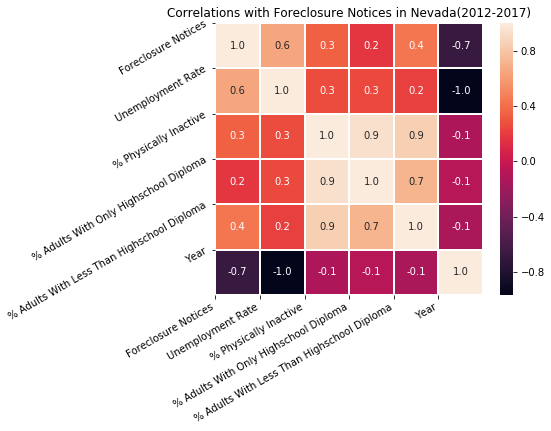

In [86]:
corr = corr_data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6, 5))
#Generate Color Map, red & blue
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".1f",linewidths="1")
#Apply xticks
plt.xticks(range(len(corr.columns)), ['Foreclosure Notices', 'Unemployment Rate', '% Physically Inactive', '% Adults With Only Highschool Diploma',
       '% Adults With Less Than Highschool Diploma', 'Year'], rotation=30, ha='right');
#Apply yticks
plt.yticks(range(len(corr.columns)), ['Foreclosure Notices', 'Unemployment Rate', '% Physically Inactive', '% Adults With Only Highschool Diploma',
       '% Adults With Less Than Highschool Diploma', 'Year'], rotation=30)
plt.title('Correlations with Foreclosure Notices in Nevada(2012-2017)')
#show plot

In [25]:
summon_data = nv1217[nv1217['combinations_clean'].isin(['1-Public Hearing','1-Summon_2-Divorce',
                                                     '1-Summon_2-Dependency_3-Child Safety','1-Summon_3-Other'])]
														   
summon_data['summon_count']=summon_data.groupby(['county', 'year', 'month'])['count'].transform('count')

summon_data['summon_count_pop'] = summon_data['summon_count']*10000/summon_data['POP_ESTIMATE']

summon_corr_data = summon_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
summon_corr_data.corr()['summon_count_pop'].sort_values(ascending=False)

summon_count_pop                                                              1.000000
Rural-urban_Continuum_Code_2013                                               0.899990
Rural_urban_continuum_code_2013                                               0.899990
Rural-urban_Continuum Code_2013                                               0.899990
2013 Rural-urban Continuum Code                                               0.899990
Urban_Influence_Code_2013_y                                                   0.870144
Urban_Influence_Code_2013_x                                                   0.870144
2013 Urban Influence Code                                                     0.870144
Urban_influence_code_2013                                                     0.870144
Urban_Influence_Code_2003_x                                                   0.847656
Urban_Influence_Code_2003_y                                                   0.847656
Rural-urban_Continuum_Code_2003            

Text(0.5,1,'Correlations with Summons in Nevada(2012-2017)')

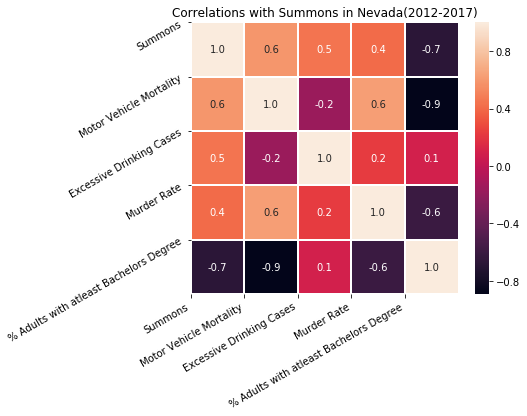

In [29]:
corr_data1 = summon_corr_data[['summon_count_pop', 'motorvehicle_mortality_rate_chr12','percent_excessive_drinking_chr12',
                        'murderrate2008','Percent of adults with a bachelor\'s degree or higher, 2012-2016']]

corr = corr_data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6, 5))
#Generate Color Map, red & blue
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".1f",linewidths="1")
#Apply xticks
plt.xticks(range(len(corr.columns)), ['Summons', 'Motor Vehicle Mortality','Excessive Drinking Cases'
                                      , 'Murder Rate','% Adults with atleast Bachelors Degree'], rotation=30, ha='right');
#Apply yticks
plt.yticks(range(len(corr.columns)), ['Summons', 'Motor Vehicle Mortality','Excessive Drinking Cases'
                                      , 'Murder Rate','% Adults with atleast Bachelors Degree'], rotation=30)
plt.title('Correlations with Summons in Nevada(2012-2017)')
#show plot

In [18]:
construction_data = nv1217[nv1217['combinations_clean'].isin(['Contractor','Construction_Contractor',
                                                      'Construction_Council','Construction'])]
														   
construction_data['construction_count']=construction_data.groupby(['county', 'year', 'month'])['count'].transform('count')

construction_data['construction_count_pop'] = construction_data['construction_count']*10000/construction_data['POP_ESTIMATE']

construction_corr_data = construction_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
construction_corr_data.corr()['construction_count_pop'].sort_values(ascending=False)

Text(0.5,1,'Correlations with Construction Notices in Nevada(2012-2017)')

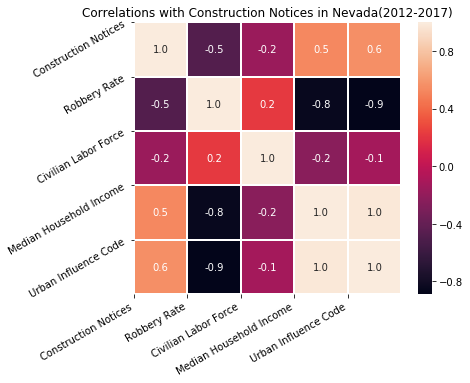

In [30]:
corr_data1 = construction_corr_data[['count', 'Urban_influence_code_2013','Med_HH_Income_Percent_of_State_Total_2016',
                        'Civilian_labor_force','robberyrate2008']]

corr = corr_data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6, 5))
#Generate Color Map, red & blue
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".1f",linewidths="1")
#Apply xticks
plt.xticks(range(len(corr.columns)), ['Construction Notices', 'Robbery Rate','Civilian Labor Force'
                                      , 'Median Household Income','Urban Influence Code'], rotation=30, ha='right');
#Apply yticks
plt.yticks(range(len(corr.columns)), ['Construction Notices', 'Robbery Rate','Civilian Labor Force'
                                      , 'Median Household Income','Urban Influence Code'], rotation=30)
plt.title('Correlations with Construction Notices in Nevada(2012-2017)')
#show plot

In [19]:
articles_data = nv1217[nv1217['combinations_clean'].isin(['1-AOO','1-AOA','1-AOD','1-AOI'])]
														   
articles_data['articles_count']=articles_data.groupby(['county', 'year', 'month'])['count'].transform('count')

articles_data['articles_count_pop'] = articles_data['articles_count']*10000/articles_data['POP_ESTIMATE']

articles_corr_data = articles_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
articles_corr_data.corr()['articles_count_pop'].sort_values(ascending=False)

Unnamed: 0                                                                   NaN
count_tags                                                                   NaN
year                                                                         NaN
month                                                                        NaN
day                                                                          NaN
FIPS                                                                         NaN
Rural_urban_continuum_code_2013                                              NaN
Urban_influence_code_2013                                                    NaN
Metro_2013                                                                   NaN
Median_Household_Income_2016                                                 NaN
Med_HH_Income_Percent_of_State_Total_2016                                    NaN
Rural-urban_Continuum_Code_2003                                              NaN
Urban_Influence_Code_2003_x 

In [20]:
articles_data[:50]

,Unnamed: 0,state,id,county,newspaper,date,notice_id,count_tags,combinations,combinations_clean,...,GQ_ESTIMATES,R_birth,R_death,R_NATURAL_INC,R_INTERNATIONAL_MIG,R_DOMESTIC_MIG,R_NET_MIG,count,articles_count,articles_count_pop
357107,357107,Nevada,3372/5192017_24142356,Washoe,Reno Gazette-Journal,2017-05-19,24142356.0,1,1-AOD,1-AOD,...,5307.0,12.260464,8.501494,3.75897,1.263943,12.773051,14.036994,1,1,0.021711


In [21]:
adoption_data = nv1217[nv1217['combinations_clean'].isin(['Adoption_Minor','1-Parenting_2-Adoption','Adoption_Board_Minor'])]
														   
adoption_data['adoption_count']=adoption_data.groupby(['county', 'year', 'month'])['count'].transform('count')

adoption_data['adoption_count_pop'] = adoption_data['adoption_count']*10000/adoption_data['POP_ESTIMATE']

adoption_corr_data = adoption_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
adoption_corr_data.corr()['adoption_count_pop'].sort_values(ascending=False)

adoption_count_pop                                                            1.000000
Rural-urban_Continuum_Code_2013                                               0.929910
Rural-urban_Continuum Code_2013                                               0.929910
2013 Rural-urban Continuum Code                                               0.929910
Rural_urban_continuum_code_2013                                               0.929910
Rural-urban_Continuum_Code_2003                                               0.919996
Rural-urban_Continuum Code_2003                                               0.919996
R_death                                                                       0.866809
Percent of adults completing some college or associate's degree, 2012-2016    0.837489
Urban_influence_code_2013                                                     0.823577
Urban_Influence_Code_2013_x                                                   0.823577
2013 Urban Influence Code                  

In [22]:
####Starting Arizona####
az1217 = pd.read_csv('C:/Users/Shubham/Desktop/DSF/Project/az_12_17_merged.csv')
az1217['count']=az1217.groupby(['county','combinations_clean', 'year', 'month']).combinations_clean.transform('count')
print(len(az1217))
az1217 = az1217.drop_duplicates(['county','combinations_clean', 'year', 'month'],inplace=False)
print(len(az1217))

1175730
13693


In [30]:
foreclosure_data = az1217[az1217['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
														   
foreclosure_data['foreclosure_count']=foreclosure_data.groupby(['county', 'year', 'month'])['count'].transform('count')

foreclosure_data['foreclosure_count_pop'] = foreclosure_data['foreclosure_count']*10000/foreclosure_data['POP_ESTIMATE']

foreclosure_corr_data = foreclosure_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
foreclosure_corr_data.corr()['foreclosure_count_pop'].sort_values(ascending=False)

foreclosure_count_pop                                                1.000000
Urban_influence_code_2013                                            0.888641
2013 Urban Influence Code                                            0.888641
Urban_Influence_Code_2013_x                                          0.888641
Urban_Influence_Code_2013_y                                          0.888641
Rural-urban_Continuum_Code_2013                                      0.881641
2013 Rural-urban Continuum Code                                      0.881641
Rural_urban_continuum_code_2013                                      0.881641
Rural-urban_Continuum Code_2013                                      0.881641
precipitation0610                                                    0.829156
Rural-urban_Continuum_Code_2003                                      0.818240
Rural-urban_Continuum Code_2003                                      0.818240
Urban_Influence_Code_2003_x                                     

In [31]:
summon_data = az1217[az1217['combinations_clean'].isin(['1-Public Hearing','1-Summon_2-Divorce',
                                                     '1-Summon_2-Dependency_3-Child Safety','1-Summon_3-Other'])]
														   
summon_data['summon_count']=summon_data.groupby(['county', 'year', 'month'])['count'].transform('count')

summon_data['summon_count_pop'] = summon_data['summon_count']*10000/summon_data['POP_ESTIMATE']

summon_corr_data = summon_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
summon_corr_data.corr()['summon_count_pop'].sort_values(ascending=False)

summon_count_pop                                                     1.000000
Urban_influence_code_2013                                            0.791042
Urban_Influence_Code_2013_y                                          0.791042
Urban_Influence_Code_2013_x                                          0.791042
2013 Urban Influence Code                                            0.791042
Rural_urban_continuum_code_2013                                      0.787285
Rural-urban_Continuum_Code_2013                                      0.787285
Rural-urban_Continuum Code_2013                                      0.787285
2013 Rural-urban Continuum Code                                      0.787285
Rural-urban_Continuum Code_2003                                      0.744945
Rural-urban_Continuum_Code_2003                                      0.744945
precipitation0610                                                    0.677815
Urban_Influence_Code_2003_y                                     

In [32]:
construction_data = az1217[ az1217['combinations_clean'].str.contains('Construction')]
														   
construction_data['construction_count']=construction_data.groupby(['county', 'year', 'month'])['count'].transform('count')

construction_data['construction_count_pop'] = construction_data['construction_count']*10000/construction_data['POP_ESTIMATE']

construction_corr_data = construction_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
construction_corr_data.corr()['construction_count_pop'].sort_values(ascending=False)

construction_count_pop                                                        1.000000
Rural_urban_continuum_code_2013                                               0.706110
Rural-urban_Continuum_Code_2013                                               0.706110
2013 Rural-urban Continuum Code                                               0.706110
Rural-urban_Continuum Code_2013                                               0.706110
Rural-urban_Continuum_Code_2003                                               0.694363
Rural-urban_Continuum Code_2003                                               0.694363
Urban_influence_code_2013                                                     0.624886
Urban_Influence_Code_2013_x                                                   0.624886
2013 Urban Influence Code                                                     0.624886
Urban_Influence_Code_2013_y                                                   0.624886
motorvehicle_mortality_rate_chr12          

In [89]:
articles_data = az1217[az1217['combinations_clean'].isin(['1-AOO','1-AOA','1-AOD','1-AOI'])]
														   
articles_data['articles_count']=articles_data.groupby(['county', 'year', 'month'])['count'].transform('count')

articles_data['articles_count_pop'] = articles_data['articles_count']*10000/articles_data['POP_ESTIMATE']

articles_corr_data = articles_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
articles_corr_data.corr()['articles_count_pop'].sort_values(ascending=False)

articles_count_pop                                                            1.000000
articles_count                                                                0.927938
count                                                                         0.701712
N_POP_CHG                                                                     0.677837
Unemployed                                                                    0.669543
DOMESTIC_MIG                                                                  0.668236
Bachelor's degree or higher, 2012-2016                                        0.667695
High school diploma only, 2012-2016                                           0.667201
Some college or associate's degree, 2012-2016                                 0.666782
Less than a high school diploma, 2012-2016                                    0.665233
Births                                                                        0.665214
NATURAL_INC                                

In [10]:
adoption_data = az1217[az1217['combinations_clean'].isin(['Adoption_Minor','1-Parenting_2-Adoption','Adoption_Board_Minor'])]
														   
adoption_data['adoption_count']=adoption_data.groupby(['county', 'year', 'month'])['count'].transform('count')

adoption_data['adoption_count_pop'] = adoption_data['adoption_count']*10000/adoption_data['POP_ESTIMATE']

adoption_corr_data = adoption_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
adoption_corr_data.corr()['adoption_count_pop'].sort_values(ascending=False)

adoption_count_pop                                                            1.000000
motorvehicle_mortality_rate_chr12                                             0.667197
Rural-urban_Continuum_Code_2013                                               0.536454
Rural-urban_Continuum Code_2013                                               0.536454
2013 Rural-urban Continuum Code                                               0.536454
Rural_urban_continuum_code_2013                                               0.536454
Rural-urban_Continuum_Code_2003                                               0.502336
Rural-urban_Continuum Code_2003                                               0.502336
Urban_influence_code_2013                                                     0.410205
Urban_Influence_Code_2013_x                                                   0.410205
2013 Urban Influence Code                                                     0.410205
Urban_Influence_Code_2013_y                

In [33]:
####Starting Lousiana ####
la1217 = pd.read_csv('C:/Users/Shubham/Desktop/DSF/Project/la_12_17_merged.csv')
la1217['count']=la1217.groupby(['county','combinations_clean', 'year', 'month']).combinations_clean.transform('count')
print(len(nv1217))
la1217 = la1217.drop_duplicates(['county','combinations_clean', 'year', 'month'],inplace=False)
print(len(nv1217))

6396
6396


In [12]:
foreclosure_data = la1217[la1217['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
														   
foreclosure_data['foreclosure_count']=foreclosure_data.groupby(['county', 'year', 'month'])['count'].transform('count')

foreclosure_data['foreclosure_count_pop'] = foreclosure_data['foreclosure_count']*10000/foreclosure_data['POP_ESTIMATE']

foreclosure_corr_data = foreclosure_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
foreclosure_corr_data.corr()['foreclosure_count_pop'].sort_values(ascending=False)

foreclosure_count_pop                                                         1.000000
Urban_influence_code_2013                                                     0.549422
Urban_Influence_Code_2013_x                                                   0.549422
2013 Urban Influence Code                                                     0.549422
Urban_Influence_Code_2013_y                                                   0.549422
Rural_urban_continuum_code_2013                                               0.500348
Rural-urban_Continuum_Code_2013                                               0.500348
2013 Rural-urban Continuum Code                                               0.500348
Rural-urban_Continuum Code_2013                                               0.500348
count                                                                         0.496099
foreclosure_count                                                             0.495953
Urban_Influence_Code_2003_x                

In [14]:
summon_data = la1217[la1217['combinations_clean'].isin(['1-Public Hearing','1-Summon_2-Divorce','1-Summon_2-Dependency',
                                                     '1-Summon_2-Dependency_3-Child Safety','1-Summon_3-Other','1-Summon_2-Probate'])]
														   
summon_data['summon_count']=summon_data.groupby(['county', 'year', 'month'])['count'].transform('count')

summon_data['summon_count_pop'] = summon_data['summon_count']*10000/summon_data['POP_ESTIMATE']

summon_corr_data = summon_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
summon_corr_data.corr()['summon_count_pop'].sort_values(ascending=False)

summon_count_pop                                                              1.000000
summon_count                                                                  0.776110
count                                                                         0.759670
INTERNATIONAL_MIG                                                             0.419450
GQ_ESTIMATES                                                                  0.410778
Employed                                                                      0.409232
Civilian_labor_force                                                          0.408391
Bachelor's degree or higher, 2012-2016                                        0.407486
POVALL_2016                                                                   0.402286
POV017_2016                                                                   0.396575
NATURAL_INC                                                                   0.396385
Births                                     

In [15]:
construction_data = la1217[ la1217['combinations_clean'].str.contains('Construction')]
														   
construction_data['construction_count']=construction_data.groupby(['county', 'year', 'month'])['count'].transform('count')

construction_data['construction_count_pop'] = construction_data['construction_count']*10000/construction_data['POP_ESTIMATE']

construction_corr_data = construction_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
construction_corr_data.corr()['construction_count_pop'].sort_values(ascending=False)

construction_count_pop                                                        1.000000
count                                                                         0.443200
construction_count                                                            0.405404
mentally_unhealthy_days_chr12                                                 0.403783
Rural_urban_continuum_code_2013                                               0.391815
2013 Rural-urban Continuum Code                                               0.391815
Rural-urban_Continuum Code_2013                                               0.391815
Rural-urban_Continuum_Code_2013                                               0.391815
Rural-urban_Continuum_Code_2003                                               0.360556
Rural-urban_Continuum Code_2003                                               0.360556
Urban_influence_code_2013                                                     0.356389
Urban_Influence_Code_2013_y                

In [16]:
articles_data = la1217[la1217['combinations_clean'].isin(['1-AOO','1-AOA','1-AOD','1-AOI'])]
														   
articles_data['articles_count']=articles_data.groupby(['county', 'year', 'month'])['count'].transform('count')

articles_data['articles_count_pop'] = articles_data['articles_count']*10000/articles_data['POP_ESTIMATE']

articles_corr_data = articles_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
articles_corr_data.corr()['articles_count_pop'].sort_values(ascending=False)

articles_count_pop                                                            1.000000
Urban_Influence_Code_2013_x                                                   0.715409
Urban_Influence_Code_2013_y                                                   0.715409
Urban_influence_code_2013                                                     0.715409
2013 Urban Influence Code                                                     0.715409
Rural-urban_Continuum Code_2013                                               0.683705
2013 Rural-urban Continuum Code                                               0.683705
Rural-urban_Continuum_Code_2013                                               0.683705
Rural_urban_continuum_code_2013                                               0.683705
Rural-urban_Continuum Code_2003                                               0.675912
Rural-urban_Continuum_Code_2003                                               0.675912
physically_unhealthy_days_chr12            

In [17]:
adoption_data = la1217[la1217['combinations_clean'].isin(['Adoption_Minor','1-Parenting_2-Adoption','Adoption_Board_Minor'])]
														   
adoption_data['adoption_count']=adoption_data.groupby(['county', 'year', 'month'])['count'].transform('count')

adoption_data['adoption_count_pop'] = adoption_data['adoption_count']*10000/adoption_data['POP_ESTIMATE']

adoption_corr_data = adoption_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
adoption_corr_data.corr()['adoption_count_pop'].sort_values(ascending=False)

adoption_count_pop                                                            1.000000
count                                                                         0.691660
adoption_count                                                                0.691660
Rural-urban_Continuum_Code_2013                                               0.648055
Rural-urban_Continuum Code_2013                                               0.648055
2013 Rural-urban Continuum Code                                               0.648055
Rural_urban_continuum_code_2013                                               0.648055
Rural-urban_Continuum_Code_2003                                               0.646508
Rural-urban_Continuum Code_2003                                               0.646508
physically_unhealthy_days_chr12                                               0.639145
Urban_Influence_Code_2003_y                                                   0.632662
Urban_Influence_Code_2003_x                

In [34]:
####Starting New Mexico ####
nm1217 = pd.read_csv('C:/Users/Shubham/Desktop/DSF/Project/nm_12_17_merged.csv')
nm1217['count']=nm1217.groupby(['county','combinations_clean', 'year', 'month']).combinations_clean.transform('count')
print(len(nm1217))
nm1217 = nm1217.drop_duplicates(['county','combinations_clean', 'year', 'month'],inplace=False)
print(len(nm1217))

169227
12829


In [35]:
foreclosure_data = nm1217[nm1217['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
														   
foreclosure_data['foreclosure_count']=foreclosure_data.groupby(['county', 'year', 'month'])['count'].transform('count')

foreclosure_data['foreclosure_count_pop'] = foreclosure_data['foreclosure_count']*10000/foreclosure_data['POP_ESTIMATE']

foreclosure_corr_data = foreclosure_data.drop(['state','id','county','newspaper','date','notice_id','combinations',
                             'combinations_clean','State_x','State_y.1','Area_Name_y'],axis=1)
							 
foreclosure_corr_data.corr()['foreclosure_count_pop'].sort_values(ascending=False)

foreclosure_count_pop                                              1.000000
R_death                                                            0.747707
Rural-urban_Continuum Code_2013                                    0.744409
Rural-urban_Continuum Code_2003                                    0.744409
Rural-urban_Continuum_Code_2013                                    0.744409
2013 Rural-urban Continuum Code                                    0.744409
Rural-urban_Continuum_Code_2003                                    0.744409
Rural_urban_continuum_code_2013                                    0.744409
physically_unhealthy_days_chr12                                    0.609500
Urban_Influence_Code_2013_x                                        0.591157
2013 Urban Influence Code                                          0.591157
Urban_influence_code_2013                                          0.591157
Urban_Influence_Code_2013_y                                        0.591157
Urban_Influe